HW5 Мельчук А.Б.
Обучить детектор объектов с помощью TensorFlow Object Detection API
Библиотеки: [Python, Tensorflow]

In [1]:
# Select TF1 in colab
%tensorflow_version 1.x
import tensorflow as tf

In [2]:
!git clone https://github.com/Dju999/TFFashionDetection.git
!pip install lxml
!pip install -U -q PyDrive
!pip install tqdm

Cloning into 'TFFashionDetection'...
remote: Counting objects: 59, done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 59 (delta 21), reused 21 (delta 11), pack-reused 28
Unpacking objects: 100% (59/59), done.


#### Монтируем датасет [DeepFashion](http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html) из google drive и копируем

In [3]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
from TFFashionDetection.utils.colab_fs import GoogleColabFS

fs = GoogleColabFS()

In [5]:
!rm -rv ./fashion_data
!cp -rv "drive/My Drive/Category and Attribute Prediction Benchmark/" ./TEMP
!mv ./TEMP ./fashion_data


In [6]:
!unzip ./fashion_data/Img/img.zip -d ./fashion_data/Img

#### Ставим Tensorflow Object Detection API

In [7]:
!pip install tf_slim

In [8]:
# загружаем репозиторий, добавляем в PYTHONPATH
! cd /content; git clone https://github.com/tensorflow/models.git
# установка зависимостей для object detection тут 
# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!cd /content; git clone https://github.com/cocodataset/cocoapi.git; cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/
!cd /content/models/research; protoc object_detection/protos/*.proto --python_out=.
# проверка
!cd /content/models/research; export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim; python object_detection/builders/model_builder_test.py

#### Формируем структуру

In [9]:
import sys
import os

import numpy as np

API_PATH = os.path.join('/content', 'models/research')
sys.path.append(API_PATH)

DETECTOR_PATH = os.path.join('/content', 'TFFashionDetection')
sys.path.append(DETECTOR_PATH)

from TFFashionDetection.data_preparator import DataPreparator
from TFFashionDetection.utils.ssd_config import write_config

data_preparator = DataPreparator()
data_preparator.build()
write_config('ssd_mobilenet_v2_coco_2018_03_29')

In [10]:
# качаем ппредоученную модель
!python /content/TFFashionDetection/utils/download_tf_zoo_model.py --name ssd_mobilenet_v2_coco_2018_03_29 --dir /content

#### Обучаем модель

In [11]:
!export PYTHONPATH=$PYTHONPATH:/content/models/research/slim:/content/models/research/;python /content/models/research/object_detection/legacy/train.py --logtostderr --pipeline_config_path=/content/data_dir/tf_api.config --train_dir=/content/data_dir/checkpoints

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please switch to tf.train.create_global_step
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession
Instructions for updating:
Please switch to tf.train.MonitoredTrainingSession


INFO:tensorflow:Restoring parameters from /content/frozen_model/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt
INFO:tensorflow:Restoring parameters from /content/frozen_model/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Recording summary at step 0.
INFO:tensorflow:Recording summary at step 0.
INFO:tensorflow:global step 1: loss = 18.1664 (46.353 sec/step)
INFO:tensorflow:global step 1: loss = 18.1664 (46.353 sec/step)
INFO:tensorflow:global step 2:

INFO:tensorflow:global step 58: loss = 8.7934 (16.627 sec/step)
INFO:tensorflow:global step 58: loss = 8.7934 (16.627 sec/step)
INFO:tensorflow:global step 59: loss = 8.8418 (16.530 sec/step)
INFO:tensorflow:global step 59: loss = 8.8418 (16.530 sec/step)
INFO:tensorflow:global step 60: loss = 8.9107 (16.578 sec/step)
INFO:tensorflow:global step 60: loss = 8.9107 (16.578 sec/step)
INFO:tensorflow:global_step/sec: 0.0612932
INFO:tensorflow:global_step/sec: 0.0612932
INFO:tensorflow:global step 61: loss = 8.6599 (19.674 sec/step)
INFO:tensorflow:global step 61: loss = 8.6599 (19.674 sec/step)
INFO:tensorflow:Recording summary at step 61.
INFO:tensorflow:Recording summary at step 61.
INFO:tensorflow:global step 62: loss = 8.6507 (18.528 sec/step)
INFO:tensorflow:global step 62: loss = 8.6507 (18.528 sec/step)
INFO:tensorflow:global step 63: loss = 8.3183 (16.566 sec/step)
INFO:tensorflow:global step 63: loss = 8.3183 (16.566 sec/step)
INFO:tensorflow:global step 64: loss = 8.0501 (16.556 

INFO:tensorflow:global step 123: loss = 7.4700 (16.550 sec/step)
INFO:tensorflow:global step 123: loss = 7.4700 (16.550 sec/step)
INFO:tensorflow:Recording summary at step 123.
INFO:tensorflow:Recording summary at step 123.
INFO:tensorflow:global step 124: loss = 7.3459 (21.819 sec/step)
INFO:tensorflow:global step 124: loss = 7.3459 (21.819 sec/step)
INFO:tensorflow:global step 125: loss = 7.8288 (16.513 sec/step)
INFO:tensorflow:global step 125: loss = 7.8288 (16.513 sec/step)
INFO:tensorflow:global step 126: loss = 7.8468 (16.467 sec/step)
INFO:tensorflow:global step 126: loss = 7.8468 (16.467 sec/step)
INFO:tensorflow:global step 127: loss = 7.6279 (16.488 sec/step)
INFO:tensorflow:global step 127: loss = 7.6279 (16.488 sec/step)
INFO:tensorflow:global step 128: loss = 7.6415 (16.588 sec/step)
INFO:tensorflow:global step 128: loss = 7.6415 (16.588 sec/step)
INFO:tensorflow:global step 129: loss = 7.3457 (16.454 sec/step)
INFO:tensorflow:global step 129: loss = 7.3457 (16.454 sec/st

INFO:tensorflow:global step 189: loss = 8.6489 (16.510 sec/step)
INFO:tensorflow:global step 189: loss = 8.6489 (16.510 sec/step)
INFO:tensorflow:global step 190: loss = 7.8800 (16.536 sec/step)
INFO:tensorflow:global step 190: loss = 7.8800 (16.536 sec/step)
INFO:tensorflow:global step 191: loss = 8.4829 (16.530 sec/step)
INFO:tensorflow:global step 191: loss = 8.4829 (16.530 sec/step)
INFO:tensorflow:global step 192: loss = 7.5549 (16.493 sec/step)
INFO:tensorflow:global step 192: loss = 7.5549 (16.493 sec/step)
INFO:tensorflow:Recording summary at step 192.
INFO:tensorflow:Recording summary at step 192.
INFO:tensorflow:global step 193: loss = 8.2272 (21.954 sec/step)
INFO:tensorflow:global step 193: loss = 8.2272 (21.954 sec/step)
INFO:tensorflow:global step 194: loss = 7.7872 (16.463 sec/step)
INFO:tensorflow:global step 194: loss = 7.7872 (16.463 sec/step)
INFO:tensorflow:global step 195: loss = 7.4381 (16.493 sec/step)
INFO:tensorflow:global step 195: loss = 7.4381 (16.493 sec/st

INFO:tensorflow:Recording summary at step 255.
INFO:tensorflow:Recording summary at step 255.
INFO:tensorflow:global step 256: loss = 6.8796 (18.662 sec/step)
INFO:tensorflow:global step 256: loss = 6.8796 (18.662 sec/step)
INFO:tensorflow:global step 257: loss = 6.7256 (16.519 sec/step)
INFO:tensorflow:global step 257: loss = 6.7256 (16.519 sec/step)
INFO:tensorflow:global step 258: loss = 6.3142 (16.505 sec/step)
INFO:tensorflow:global step 258: loss = 6.3142 (16.505 sec/step)
INFO:tensorflow:global step 259: loss = 6.8299 (16.588 sec/step)
INFO:tensorflow:global step 259: loss = 6.8299 (16.588 sec/step)
INFO:tensorflow:global step 260: loss = 6.4625 (16.540 sec/step)
INFO:tensorflow:global step 260: loss = 6.4625 (16.540 sec/step)
INFO:tensorflow:global step 261: loss = 7.9671 (16.553 sec/step)
INFO:tensorflow:global step 261: loss = 7.9671 (16.553 sec/step)
INFO:tensorflow:global step 262: loss = 8.1365 (20.500 sec/step)
INFO:tensorflow:global step 262: loss = 8.1365 (20.500 sec/st

INFO:tensorflow:global step 321: loss = 6.9266 (16.442 sec/step)
INFO:tensorflow:global step 321: loss = 6.9266 (16.442 sec/step)
INFO:tensorflow:global step 322: loss = 7.1175 (16.483 sec/step)
INFO:tensorflow:global step 322: loss = 7.1175 (16.483 sec/step)
INFO:tensorflow:global step 323: loss = 6.0498 (16.538 sec/step)
INFO:tensorflow:global step 323: loss = 6.0498 (16.538 sec/step)
INFO:tensorflow:global step 324: loss = 6.7155 (16.416 sec/step)
INFO:tensorflow:global step 324: loss = 6.7155 (16.416 sec/step)
INFO:tensorflow:Recording summary at step 324.
INFO:tensorflow:Recording summary at step 324.
INFO:tensorflow:global step 325: loss = 6.9254 (21.878 sec/step)
INFO:tensorflow:global step 325: loss = 6.9254 (21.878 sec/step)
INFO:tensorflow:global step 326: loss = 6.4460 (16.485 sec/step)
INFO:tensorflow:global step 326: loss = 6.4460 (16.485 sec/step)
INFO:tensorflow:global step 327: loss = 6.2525 (16.497 sec/step)
INFO:tensorflow:global step 327: loss = 6.2525 (16.497 sec/st

INFO:tensorflow:global step 386: loss = 7.2410 (16.457 sec/step)
INFO:tensorflow:global step 386: loss = 7.2410 (16.457 sec/step)
INFO:tensorflow:Recording summary at step 386.
INFO:tensorflow:Recording summary at step 386.
INFO:tensorflow:global step 387: loss = 7.1833 (22.018 sec/step)
INFO:tensorflow:global step 387: loss = 7.1833 (22.018 sec/step)
INFO:tensorflow:global step 388: loss = 7.2463 (16.486 sec/step)
INFO:tensorflow:global step 388: loss = 7.2463 (16.486 sec/step)
INFO:tensorflow:global step 389: loss = 7.9433 (16.422 sec/step)
INFO:tensorflow:global step 389: loss = 7.9433 (16.422 sec/step)
INFO:tensorflow:global step 390: loss = 7.0578 (16.457 sec/step)
INFO:tensorflow:global step 390: loss = 7.0578 (16.457 sec/step)
INFO:tensorflow:global step 391: loss = 7.0220 (16.526 sec/step)
INFO:tensorflow:global step 391: loss = 7.0220 (16.526 sec/step)
INFO:tensorflow:global step 392: loss = 7.4421 (16.508 sec/step)
INFO:tensorflow:global step 392: loss = 7.4421 (16.508 sec/st

INFO:tensorflow:global step 452: loss = 8.3413 (16.505 sec/step)
INFO:tensorflow:global step 452: loss = 8.3413 (16.505 sec/step)
INFO:tensorflow:global step 453: loss = 7.6978 (16.539 sec/step)
INFO:tensorflow:global step 453: loss = 7.6978 (16.539 sec/step)
INFO:tensorflow:global step 454: loss = 7.7368 (16.510 sec/step)
INFO:tensorflow:global step 454: loss = 7.7368 (16.510 sec/step)
INFO:tensorflow:global step 455: loss = 6.5932 (16.487 sec/step)
INFO:tensorflow:global step 455: loss = 6.5932 (16.487 sec/step)
INFO:tensorflow:Recording summary at step 455.
INFO:tensorflow:Recording summary at step 455.
INFO:tensorflow:global step 456: loss = 7.8522 (21.889 sec/step)
INFO:tensorflow:global step 456: loss = 7.8522 (21.889 sec/step)
INFO:tensorflow:global step 457: loss = 7.7835 (16.519 sec/step)
INFO:tensorflow:global step 457: loss = 7.7835 (16.519 sec/step)
INFO:tensorflow:global step 458: loss = 6.5540 (16.460 sec/step)
INFO:tensorflow:global step 458: loss = 6.5540 (16.460 sec/st

INFO:tensorflow:Recording summary at step 518.
INFO:tensorflow:Recording summary at step 518.
INFO:tensorflow:global step 519: loss = 6.3651 (19.920 sec/step)
INFO:tensorflow:global step 519: loss = 6.3651 (19.920 sec/step)
INFO:tensorflow:global step 520: loss = 6.2369 (16.531 sec/step)
INFO:tensorflow:global step 520: loss = 6.2369 (16.531 sec/step)
INFO:tensorflow:global step 521: loss = 6.7282 (16.484 sec/step)
INFO:tensorflow:global step 521: loss = 6.7282 (16.484 sec/step)
INFO:tensorflow:global step 522: loss = 7.9885 (16.479 sec/step)
INFO:tensorflow:global step 522: loss = 7.9885 (16.479 sec/step)
INFO:tensorflow:global step 523: loss = 8.3289 (16.526 sec/step)
INFO:tensorflow:global step 523: loss = 8.3289 (16.526 sec/step)
INFO:tensorflow:global step 524: loss = 7.7579 (16.493 sec/step)
INFO:tensorflow:global step 524: loss = 7.7579 (16.493 sec/step)
INFO:tensorflow:global step 525: loss = 8.2450 (20.134 sec/step)
INFO:tensorflow:global step 525: loss = 8.2450 (20.134 sec/st

INFO:tensorflow:global step 586: loss = 6.3133 (16.485 sec/step)
INFO:tensorflow:global step 586: loss = 6.3133 (16.485 sec/step)
INFO:tensorflow:global step 587: loss = 6.2100 (16.514 sec/step)
INFO:tensorflow:global step 587: loss = 6.2100 (16.514 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 587.
INFO:tensorflow:Recording summary at step 587.
INFO:tensorflow:global step 588: loss = 6.9942 (23.963 sec/step)
INFO:tensorflow:global step 588: loss = 6.9942 (23.963 sec/step)
INFO:tensorflow:global step 589: loss = 6.4627 (16.605 sec/step)
INFO:tensorflow:global step 589: loss = 6.4627 (16.605 sec/step)
INFO:tensorflow:global step 590: loss = 7.1459 (16.523 sec/step)
INFO:tensorflow:global step 590: loss = 7.1459 (16.523 sec/step)
INFO:tensorflow:global step 591: loss = 6.8610 (16.454 sec/step)
INFO:tensorflow:global st

INFO:tensorflow:global step 650: loss = 6.1597 (21.791 sec/step)
INFO:tensorflow:global step 650: loss = 6.1597 (21.791 sec/step)
INFO:tensorflow:global step 651: loss = 6.6219 (16.428 sec/step)
INFO:tensorflow:global step 651: loss = 6.6219 (16.428 sec/step)
INFO:tensorflow:global step 652: loss = 6.2410 (16.498 sec/step)
INFO:tensorflow:global step 652: loss = 6.2410 (16.498 sec/step)
INFO:tensorflow:global step 653: loss = 6.5881 (16.428 sec/step)
INFO:tensorflow:global step 653: loss = 6.5881 (16.428 sec/step)
INFO:tensorflow:global step 654: loss = 7.3650 (16.342 sec/step)
INFO:tensorflow:global step 654: loss = 7.3650 (16.342 sec/step)
INFO:tensorflow:global step 655: loss = 6.4534 (16.423 sec/step)
INFO:tensorflow:global step 655: loss = 6.4534 (16.423 sec/step)
INFO:tensorflow:global step 656: loss = 6.7130 (16.462 sec/step)
INFO:tensorflow:global step 656: loss = 6.7130 (16.462 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:te

INFO:tensorflow:global step 716: loss = 7.5053 (16.487 sec/step)
INFO:tensorflow:global step 716: loss = 7.5053 (16.487 sec/step)
INFO:tensorflow:global step 717: loss = 7.2491 (16.472 sec/step)
INFO:tensorflow:global step 717: loss = 7.2491 (16.472 sec/step)
INFO:tensorflow:global step 718: loss = 7.1792 (16.513 sec/step)
INFO:tensorflow:global step 718: loss = 7.1792 (16.513 sec/step)
INFO:tensorflow:Recording summary at step 718.
INFO:tensorflow:Recording summary at step 718.
INFO:tensorflow:global step 719: loss = 7.0315 (21.823 sec/step)
INFO:tensorflow:global step 719: loss = 7.0315 (21.823 sec/step)
INFO:tensorflow:global step 720: loss = 7.5651 (16.450 sec/step)
INFO:tensorflow:global step 720: loss = 7.5651 (16.450 sec/step)
INFO:tensorflow:global step 721: loss = 7.1361 (16.545 sec/step)
INFO:tensorflow:global step 721: loss = 7.1361 (16.545 sec/step)
INFO:tensorflow:global step 722: loss = 7.2505 (16.414 sec/step)
INFO:tensorflow:global step 722: loss = 7.2505 (16.414 sec/st

INFO:tensorflow:global step 782: loss = 5.9156 (21.326 sec/step)
INFO:tensorflow:global step 782: loss = 5.9156 (21.326 sec/step)
INFO:tensorflow:global step 783: loss = 7.7920 (16.524 sec/step)
INFO:tensorflow:global step 783: loss = 7.7920 (16.524 sec/step)
INFO:tensorflow:global step 784: loss = 7.5959 (16.528 sec/step)
INFO:tensorflow:global step 784: loss = 7.5959 (16.528 sec/step)
INFO:tensorflow:global step 785: loss = 7.3595 (16.456 sec/step)
INFO:tensorflow:global step 785: loss = 7.3595 (16.456 sec/step)
INFO:tensorflow:global step 786: loss = 7.0726 (16.517 sec/step)
INFO:tensorflow:global step 786: loss = 7.0726 (16.517 sec/step)
INFO:tensorflow:global step 787: loss = 8.3121 (16.549 sec/step)
INFO:tensorflow:global step 787: loss = 8.3121 (16.549 sec/step)
INFO:tensorflow:global step 788: loss = 6.8248 (17.824 sec/step)
INFO:tensorflow:global step 788: loss = 6.8248 (17.824 sec/step)
INFO:tensorflow:Recording summary at step 788.
INFO:tensorflow:Recording summary at step 7

INFO:tensorflow:global step 848: loss = 5.4808 (16.444 sec/step)
INFO:tensorflow:global step 848: loss = 5.4808 (16.444 sec/step)
INFO:tensorflow:global step 849: loss = 5.4110 (16.408 sec/step)
INFO:tensorflow:global step 849: loss = 5.4110 (16.408 sec/step)
INFO:tensorflow:global step 850: loss = 5.6286 (16.490 sec/step)
INFO:tensorflow:global step 850: loss = 5.6286 (16.490 sec/step)
INFO:tensorflow:Recording summary at step 850.
INFO:tensorflow:Recording summary at step 850.
INFO:tensorflow:global step 851: loss = 5.9789 (21.876 sec/step)
INFO:tensorflow:global step 851: loss = 5.9789 (21.876 sec/step)
INFO:tensorflow:global step 852: loss = 6.3492 (16.503 sec/step)
INFO:tensorflow:global step 852: loss = 6.3492 (16.503 sec/step)
INFO:tensorflow:global step 853: loss = 4.8856 (16.514 sec/step)
INFO:tensorflow:global step 853: loss = 4.8856 (16.514 sec/step)
INFO:tensorflow:global step 854: loss = 6.0148 (16.457 sec/step)
INFO:tensorflow:global step 854: loss = 6.0148 (16.457 sec/st

INFO:tensorflow:global step 914: loss = 6.2635 (16.585 sec/step)
INFO:tensorflow:global step 914: loss = 6.2635 (16.585 sec/step)
INFO:tensorflow:global step 915: loss = 5.4240 (16.610 sec/step)
INFO:tensorflow:global step 915: loss = 5.4240 (16.610 sec/step)
INFO:tensorflow:global step 916: loss = 6.5817 (16.567 sec/step)
INFO:tensorflow:global step 916: loss = 6.5817 (16.567 sec/step)
INFO:tensorflow:global step 917: loss = 5.4938 (16.585 sec/step)
INFO:tensorflow:global step 917: loss = 5.4938 (16.585 sec/step)
INFO:tensorflow:global step 918: loss = 6.1446 (16.511 sec/step)
INFO:tensorflow:global step 918: loss = 6.1446 (16.511 sec/step)
INFO:tensorflow:global step 919: loss = 5.0761 (16.550 sec/step)
INFO:tensorflow:global step 919: loss = 5.0761 (16.550 sec/step)
INFO:tensorflow:Recording summary at step 919.
INFO:tensorflow:Recording summary at step 919.
INFO:tensorflow:global step 920: loss = 5.9221 (21.898 sec/step)
INFO:tensorflow:global step 920: loss = 5.9221 (21.898 sec/st

INFO:tensorflow:global step 981: loss = 6.8884 (16.614 sec/step)
INFO:tensorflow:global step 981: loss = 6.8884 (16.614 sec/step)
INFO:tensorflow:Recording summary at step 981.
INFO:tensorflow:Recording summary at step 981.
INFO:tensorflow:global step 982: loss = 6.5776 (22.055 sec/step)
INFO:tensorflow:global step 982: loss = 6.5776 (22.055 sec/step)
INFO:tensorflow:global step 983: loss = 7.4058 (16.586 sec/step)
INFO:tensorflow:global step 983: loss = 7.4058 (16.586 sec/step)
INFO:tensorflow:global step 984: loss = 6.7106 (16.642 sec/step)
INFO:tensorflow:global step 984: loss = 6.7106 (16.642 sec/step)
INFO:tensorflow:global step 985: loss = 6.8278 (16.676 sec/step)
INFO:tensorflow:global step 985: loss = 6.8278 (16.676 sec/step)
INFO:tensorflow:global step 986: loss = 6.7609 (16.601 sec/step)
INFO:tensorflow:global step 986: loss = 6.7609 (16.601 sec/step)
INFO:tensorflow:global step 987: loss = 6.0781 (16.561 sec/step)
INFO:tensorflow:global step 987: loss = 6.0781 (16.561 sec/st

INFO:tensorflow:global step 1047: loss = 7.4484 (16.660 sec/step)
INFO:tensorflow:global step 1047: loss = 7.4484 (16.660 sec/step)
INFO:tensorflow:global step 1048: loss = 7.7363 (16.542 sec/step)
INFO:tensorflow:global step 1048: loss = 7.7363 (16.542 sec/step)
INFO:tensorflow:global step 1049: loss = 7.2410 (16.509 sec/step)
INFO:tensorflow:global step 1049: loss = 7.2410 (16.509 sec/step)
INFO:tensorflow:global step 1050: loss = 7.9002 (18.113 sec/step)
INFO:tensorflow:global step 1050: loss = 7.9002 (18.113 sec/step)
INFO:tensorflow:Recording summary at step 1050.
INFO:tensorflow:Recording summary at step 1050.
INFO:tensorflow:global step 1051: loss = 6.9883 (20.245 sec/step)
INFO:tensorflow:global step 1051: loss = 6.9883 (20.245 sec/step)
INFO:tensorflow:global step 1052: loss = 7.9342 (16.558 sec/step)
INFO:tensorflow:global step 1052: loss = 7.9342 (16.558 sec/step)
INFO:tensorflow:global step 1053: loss = 6.3582 (16.535 sec/step)
INFO:tensorflow:global step 1053: loss = 6.358

INFO:tensorflow:global step 1112: loss = 6.4626 (16.492 sec/step)
INFO:tensorflow:global step 1112: loss = 6.4626 (16.492 sec/step)
INFO:tensorflow:Recording summary at step 1112.
INFO:tensorflow:Recording summary at step 1112.
INFO:tensorflow:global step 1113: loss = 6.2153 (21.758 sec/step)
INFO:tensorflow:global step 1113: loss = 6.2153 (21.758 sec/step)
INFO:tensorflow:global step 1114: loss = 5.8051 (16.508 sec/step)
INFO:tensorflow:global step 1114: loss = 5.8051 (16.508 sec/step)
INFO:tensorflow:global step 1115: loss = 6.4606 (16.517 sec/step)
INFO:tensorflow:global step 1115: loss = 6.4606 (16.517 sec/step)
INFO:tensorflow:global step 1116: loss = 5.9665 (16.510 sec/step)
INFO:tensorflow:global step 1116: loss = 5.9665 (16.510 sec/step)
INFO:tensorflow:global step 1117: loss = 6.8336 (16.503 sec/step)
INFO:tensorflow:global step 1117: loss = 6.8336 (16.503 sec/step)
INFO:tensorflow:global step 1118: loss = 5.8416 (16.522 sec/step)
INFO:tensorflow:global step 1118: loss = 5.841

INFO:tensorflow:global step 1178: loss = 6.0611 (16.614 sec/step)
INFO:tensorflow:global step 1178: loss = 6.0611 (16.614 sec/step)
INFO:tensorflow:global step 1179: loss = 6.4380 (16.513 sec/step)
INFO:tensorflow:global step 1179: loss = 6.4380 (16.513 sec/step)
INFO:tensorflow:global step 1180: loss = 6.1197 (16.604 sec/step)
INFO:tensorflow:global step 1180: loss = 6.1197 (16.604 sec/step)
INFO:tensorflow:global step 1181: loss = 5.7776 (16.600 sec/step)
INFO:tensorflow:global step 1181: loss = 5.7776 (16.600 sec/step)
INFO:tensorflow:Recording summary at step 1181.
INFO:tensorflow:Recording summary at step 1181.
INFO:tensorflow:global step 1182: loss = 6.1273 (22.030 sec/step)
INFO:tensorflow:global step 1182: loss = 6.1273 (22.030 sec/step)
INFO:tensorflow:global step 1183: loss = 5.5376 (16.535 sec/step)
INFO:tensorflow:global step 1183: loss = 5.5376 (16.535 sec/step)
INFO:tensorflow:global step 1184: loss = 5.5880 (16.554 sec/step)
INFO:tensorflow:global step 1184: loss = 5.588

INFO:tensorflow:global step 1244: loss = 6.7161 (24.196 sec/step)
INFO:tensorflow:global step 1244: loss = 6.7161 (24.196 sec/step)
INFO:tensorflow:global step 1245: loss = 6.2919 (16.692 sec/step)
INFO:tensorflow:global step 1245: loss = 6.2919 (16.692 sec/step)
INFO:tensorflow:global step 1246: loss = 5.7305 (16.760 sec/step)
INFO:tensorflow:global step 1246: loss = 5.7305 (16.760 sec/step)
INFO:tensorflow:global step 1247: loss = 6.6713 (16.597 sec/step)
INFO:tensorflow:global step 1247: loss = 6.6713 (16.597 sec/step)
INFO:tensorflow:global step 1248: loss = 5.1038 (16.650 sec/step)
INFO:tensorflow:global step 1248: loss = 5.1038 (16.650 sec/step)
INFO:tensorflow:global step 1249: loss = 5.7113 (16.693 sec/step)
INFO:tensorflow:global step 1249: loss = 5.7113 (16.693 sec/step)
INFO:tensorflow:global step 1250: loss = 5.6767 (16.540 sec/step)
INFO:tensorflow:global step 1250: loss = 5.6767 (16.540 sec/step)
INFO:tensorflow:Recording summary at step 1250.
INFO:tensorflow:Recording su

INFO:tensorflow:global step 1310: loss = 7.3384 (16.577 sec/step)
INFO:tensorflow:global step 1310: loss = 7.3384 (16.577 sec/step)
INFO:tensorflow:global step 1311: loss = 6.9277 (16.632 sec/step)
INFO:tensorflow:global step 1311: loss = 6.9277 (16.632 sec/step)
INFO:tensorflow:global step 1312: loss = 7.1880 (16.546 sec/step)
INFO:tensorflow:global step 1312: loss = 7.1880 (16.546 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 1312.
INFO:tensorflow:Recording summary at step 1312.
INFO:tensorflow:global step 1313: loss = 7.7471 (24.330 sec/step)
INFO:tensorflow:global step 1313: loss = 7.7471 (24.330 sec/step)
INFO:tensorflow:global step 1314: loss = 6.5906 (16.681 sec/step)
INFO:tensorflow:global step 1314: loss = 6.5906 (16.681 sec/step)
INFO:tensorflow:global step 1315: loss = 6.9290 (16.668 sec/step)
INFO:tensorf

INFO:tensorflow:Recording summary at step 1374.
INFO:tensorflow:Recording summary at step 1374.
INFO:tensorflow:global step 1375: loss = 5.9747 (21.910 sec/step)
INFO:tensorflow:global step 1375: loss = 5.9747 (21.910 sec/step)
INFO:tensorflow:global step 1376: loss = 6.1605 (16.497 sec/step)
INFO:tensorflow:global step 1376: loss = 6.1605 (16.497 sec/step)
INFO:tensorflow:global step 1377: loss = 5.2189 (16.652 sec/step)
INFO:tensorflow:global step 1377: loss = 5.2189 (16.652 sec/step)
INFO:tensorflow:global step 1378: loss = 5.8329 (16.584 sec/step)
INFO:tensorflow:global step 1378: loss = 5.8329 (16.584 sec/step)
INFO:tensorflow:global step 1379: loss = 6.6188 (16.704 sec/step)
INFO:tensorflow:global step 1379: loss = 6.6188 (16.704 sec/step)
INFO:tensorflow:global step 1380: loss = 6.9709 (16.622 sec/step)
INFO:tensorflow:global step 1380: loss = 6.9709 (16.622 sec/step)
INFO:tensorflow:global step 1381: loss = 8.0676 (16.595 sec/step)
INFO:tensorflow:global step 1381: loss = 8.067

INFO:tensorflow:global step 1439: loss = 5.9407 (16.580 sec/step)
INFO:tensorflow:global step 1439: loss = 5.9407 (16.580 sec/step)
INFO:tensorflow:global step 1440: loss = 5.4652 (16.602 sec/step)
INFO:tensorflow:global step 1440: loss = 5.4652 (16.602 sec/step)
INFO:tensorflow:global step 1441: loss = 5.2358 (16.573 sec/step)
INFO:tensorflow:global step 1441: loss = 5.2358 (16.573 sec/step)
INFO:tensorflow:global step 1442: loss = 5.2105 (16.593 sec/step)
INFO:tensorflow:global step 1442: loss = 5.2105 (16.593 sec/step)
INFO:tensorflow:global step 1443: loss = 6.0377 (16.486 sec/step)
INFO:tensorflow:global step 1443: loss = 6.0377 (16.486 sec/step)
INFO:tensorflow:Recording summary at step 1443.
INFO:tensorflow:Recording summary at step 1443.
INFO:tensorflow:global step 1444: loss = 5.6507 (21.933 sec/step)
INFO:tensorflow:global step 1444: loss = 5.6507 (21.933 sec/step)
INFO:tensorflow:global step 1445: loss = 5.8650 (16.537 sec/step)
INFO:tensorflow:global step 1445: loss = 5.865

INFO:tensorflow:global step 1504: loss = 6.0400 (16.588 sec/step)
INFO:tensorflow:global step 1504: loss = 6.0400 (16.588 sec/step)
INFO:tensorflow:global step 1505: loss = 6.2573 (16.515 sec/step)
INFO:tensorflow:global step 1505: loss = 6.2573 (16.515 sec/step)
INFO:tensorflow:Recording summary at step 1505.
INFO:tensorflow:Recording summary at step 1505.
INFO:tensorflow:global step 1506: loss = 6.3559 (22.015 sec/step)
INFO:tensorflow:global step 1506: loss = 6.3559 (22.015 sec/step)
INFO:tensorflow:global step 1507: loss = 6.4697 (16.487 sec/step)
INFO:tensorflow:global step 1507: loss = 6.4697 (16.487 sec/step)
INFO:tensorflow:global step 1508: loss = 6.2357 (16.557 sec/step)
INFO:tensorflow:global step 1508: loss = 6.2357 (16.557 sec/step)
INFO:tensorflow:global step 1509: loss = 6.6718 (16.533 sec/step)
INFO:tensorflow:global step 1509: loss = 6.6718 (16.533 sec/step)
INFO:tensorflow:global step 1510: loss = 6.2839 (16.567 sec/step)
INFO:tensorflow:global step 1510: loss = 6.283

INFO:tensorflow:Recording summary at step 1568.
INFO:tensorflow:Recording summary at step 1568.
INFO:tensorflow:global step 1569: loss = 7.3200 (17.991 sec/step)
INFO:tensorflow:global step 1569: loss = 7.3200 (17.991 sec/step)
INFO:tensorflow:global step 1570: loss = 7.0038 (16.401 sec/step)
INFO:tensorflow:global step 1570: loss = 7.0038 (16.401 sec/step)
INFO:tensorflow:global step 1571: loss = 7.3108 (16.479 sec/step)
INFO:tensorflow:global step 1571: loss = 7.3108 (16.479 sec/step)
INFO:tensorflow:global step 1572: loss = 6.9577 (16.502 sec/step)
INFO:tensorflow:global step 1572: loss = 6.9577 (16.502 sec/step)
INFO:tensorflow:global step 1573: loss = 7.5766 (16.464 sec/step)
INFO:tensorflow:global step 1573: loss = 7.5766 (16.464 sec/step)
INFO:tensorflow:global step 1574: loss = 6.7447 (16.488 sec/step)
INFO:tensorflow:global step 1574: loss = 6.7447 (16.488 sec/step)
INFO:tensorflow:global step 1575: loss = 7.3787 (20.746 sec/step)
INFO:tensorflow:global step 1575: loss = 7.378

INFO:tensorflow:global step 1634: loss = 6.1130 (16.604 sec/step)
INFO:tensorflow:global step 1634: loss = 6.1130 (16.604 sec/step)
INFO:tensorflow:global step 1635: loss = 6.2742 (16.482 sec/step)
INFO:tensorflow:global step 1635: loss = 6.2742 (16.482 sec/step)
INFO:tensorflow:global step 1636: loss = 6.2354 (16.549 sec/step)
INFO:tensorflow:global step 1636: loss = 6.2354 (16.549 sec/step)
INFO:tensorflow:global step 1637: loss = 6.2911 (16.517 sec/step)
INFO:tensorflow:global step 1637: loss = 6.2911 (16.517 sec/step)
INFO:tensorflow:Recording summary at step 1637.
INFO:tensorflow:Recording summary at step 1637.
INFO:tensorflow:global step 1638: loss = 5.8595 (21.882 sec/step)
INFO:tensorflow:global step 1638: loss = 5.8595 (21.882 sec/step)
INFO:tensorflow:global step 1639: loss = 5.6925 (16.440 sec/step)
INFO:tensorflow:global step 1639: loss = 5.6925 (16.440 sec/step)
INFO:tensorflow:global step 1640: loss = 6.9414 (16.487 sec/step)
INFO:tensorflow:global step 1640: loss = 6.941

INFO:tensorflow:Recording summary at step 1699.
INFO:tensorflow:Recording summary at step 1699.
INFO:tensorflow:global step 1700: loss = 6.1769 (21.950 sec/step)
INFO:tensorflow:global step 1700: loss = 6.1769 (21.950 sec/step)
INFO:tensorflow:global step 1701: loss = 6.0046 (16.552 sec/step)
INFO:tensorflow:global step 1701: loss = 6.0046 (16.552 sec/step)
INFO:tensorflow:global step 1702: loss = 6.0361 (16.549 sec/step)
INFO:tensorflow:global step 1702: loss = 6.0361 (16.549 sec/step)
INFO:tensorflow:global step 1703: loss = 5.5558 (16.590 sec/step)
INFO:tensorflow:global step 1703: loss = 5.5558 (16.590 sec/step)
INFO:tensorflow:global step 1704: loss = 6.1483 (16.534 sec/step)
INFO:tensorflow:global step 1704: loss = 6.1483 (16.534 sec/step)
INFO:tensorflow:global step 1705: loss = 5.0113 (16.484 sec/step)
INFO:tensorflow:global step 1705: loss = 5.0113 (16.484 sec/step)
INFO:tensorflow:global step 1706: loss = 5.9517 (16.558 sec/step)
INFO:tensorflow:global step 1706: loss = 5.951

INFO:tensorflow:global step 1765: loss = 7.0951 (16.502 sec/step)
INFO:tensorflow:global step 1765: loss = 7.0951 (16.502 sec/step)
INFO:tensorflow:global step 1766: loss = 7.5797 (16.450 sec/step)
INFO:tensorflow:global step 1766: loss = 7.5797 (16.450 sec/step)
INFO:tensorflow:global step 1767: loss = 6.9519 (16.463 sec/step)
INFO:tensorflow:global step 1767: loss = 6.9519 (16.463 sec/step)
INFO:tensorflow:global step 1768: loss = 6.6037 (16.416 sec/step)
INFO:tensorflow:global step 1768: loss = 6.6037 (16.416 sec/step)
INFO:tensorflow:Recording summary at step 1768.
INFO:tensorflow:Recording summary at step 1768.
INFO:tensorflow:global step 1769: loss = 6.8431 (21.834 sec/step)
INFO:tensorflow:global step 1769: loss = 6.8431 (21.834 sec/step)
INFO:tensorflow:global step 1770: loss = 6.6811 (16.450 sec/step)
INFO:tensorflow:global step 1770: loss = 6.6811 (16.450 sec/step)
INFO:tensorflow:global step 1771: loss = 7.4051 (16.399 sec/step)
INFO:tensorflow:global step 1771: loss = 7.405

INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 1831.
INFO:tensorflow:Recording summary at step 1831.
INFO:tensorflow:global step 1832: loss = 6.8178 (23.866 sec/step)
INFO:tensorflow:global step 1832: loss = 6.8178 (23.866 sec/step)
INFO:tensorflow:global step 1833: loss = 6.9193 (16.387 sec/step)
INFO:tensorflow:global step 1833: loss = 6.9193 (16.387 sec/step)
INFO:tensorflow:global step 1834: loss = 7.0593 (16.396 sec/step)
INFO:tensorflow:global step 1834: loss = 7.0593 (16.396 sec/step)
INFO:tensorflow:global step 1835: loss = 6.7057 (16.382 sec/step)
INFO:tensorflow:global step 1835: loss = 6.7057 (16.382 sec/step)
INFO:tensorflow:global step 1836: loss = 6.5735 (16.408 sec/step)
INFO:tensorflow:global step 1836: loss = 6.5735 (16.408 sec/step)
INFO:tensorflow:global step 1837: loss = 6.2380 (16.430 sec/step)
INFO:tensorf

INFO:tensorflow:global step 1895: loss = 6.3482 (16.538 sec/step)
INFO:tensorflow:global step 1895: loss = 6.3482 (16.538 sec/step)
INFO:tensorflow:global step 1896: loss = 6.5631 (16.475 sec/step)
INFO:tensorflow:global step 1896: loss = 6.5631 (16.475 sec/step)
INFO:tensorflow:global step 1897: loss = 5.8805 (16.494 sec/step)
INFO:tensorflow:global step 1897: loss = 5.8805 (16.494 sec/step)
INFO:tensorflow:global step 1898: loss = 5.8636 (16.499 sec/step)
INFO:tensorflow:global step 1898: loss = 5.8636 (16.499 sec/step)
INFO:tensorflow:global step 1899: loss = 5.7844 (16.507 sec/step)
INFO:tensorflow:global step 1899: loss = 5.7844 (16.507 sec/step)
INFO:tensorflow:global step 1900: loss = 6.6328 (16.490 sec/step)
INFO:tensorflow:global step 1900: loss = 6.6328 (16.490 sec/step)
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Saving checkpoint to path /content/data_dir/checkpoints/model.ckpt
INFO:tensorflow:Recording summary at step 

INFO:tensorflow:global step 1960: loss = 6.4928 (16.488 sec/step)
INFO:tensorflow:global step 1960: loss = 6.4928 (16.488 sec/step)
INFO:tensorflow:global step 1961: loss = 5.9004 (16.471 sec/step)
INFO:tensorflow:global step 1961: loss = 5.9004 (16.471 sec/step)
INFO:tensorflow:global step 1962: loss = 6.3375 (16.476 sec/step)
INFO:tensorflow:global step 1962: loss = 6.3375 (16.476 sec/step)
INFO:tensorflow:Recording summary at step 1962.
INFO:tensorflow:Recording summary at step 1962.
INFO:tensorflow:global step 1963: loss = 6.5310 (21.882 sec/step)
INFO:tensorflow:global step 1963: loss = 6.5310 (21.882 sec/step)
INFO:tensorflow:global step 1964: loss = 6.5809 (16.506 sec/step)
INFO:tensorflow:global step 1964: loss = 6.5809 (16.506 sec/step)
INFO:tensorflow:global step 1965: loss = 6.1121 (16.527 sec/step)
INFO:tensorflow:global step 1965: loss = 6.1121 (16.527 sec/step)
INFO:tensorflow:global step 1966: loss = 7.1955 (16.513 sec/step)
INFO:tensorflow:global step 1966: loss = 7.195

INFO:tensorflow:global step 2025: loss = 6.1490 (20.020 sec/step)
INFO:tensorflow:global step 2025: loss = 6.1490 (20.020 sec/step)
INFO:tensorflow:Recording summary at step 2025.
INFO:tensorflow:Recording summary at step 2025.
INFO:tensorflow:global step 2026: loss = 6.2735 (18.078 sec/step)
INFO:tensorflow:global step 2026: loss = 6.2735 (18.078 sec/step)
INFO:tensorflow:global step 2027: loss = 6.1936 (16.447 sec/step)
INFO:tensorflow:global step 2027: loss = 6.1936 (16.447 sec/step)
INFO:tensorflow:global step 2028: loss = 6.0427 (16.382 sec/step)
INFO:tensorflow:global step 2028: loss = 6.0427 (16.382 sec/step)
INFO:tensorflow:global step 2029: loss = 6.5742 (16.397 sec/step)
INFO:tensorflow:global step 2029: loss = 6.5742 (16.397 sec/step)
INFO:tensorflow:global step 2030: loss = 5.6738 (16.439 sec/step)
INFO:tensorflow:global step 2030: loss = 5.6738 (16.439 sec/step)
INFO:tensorflow:global step 2031: loss = 6.1475 (16.448 sec/step)
INFO:tensorflow:global step 2031: loss = 6.147

INFO:tensorflow:global step 2089: loss = 8.1411 (16.600 sec/step)
INFO:tensorflow:global step 2089: loss = 8.1411 (16.600 sec/step)
INFO:tensorflow:global step 2090: loss = 7.6616 (16.477 sec/step)
INFO:tensorflow:global step 2090: loss = 7.6616 (16.477 sec/step)
INFO:tensorflow:global step 2091: loss = 8.3010 (16.509 sec/step)
INFO:tensorflow:global step 2091: loss = 8.3010 (16.509 sec/step)
INFO:tensorflow:global step 2092: loss = 7.3084 (16.482 sec/step)
INFO:tensorflow:global step 2092: loss = 7.3084 (16.482 sec/step)
INFO:tensorflow:global step 2093: loss = 6.4377 (16.602 sec/step)
INFO:tensorflow:global step 2093: loss = 6.4377 (16.602 sec/step)
INFO:tensorflow:global step 2094: loss = 6.6885 (19.052 sec/step)
INFO:tensorflow:global step 2094: loss = 6.6885 (19.052 sec/step)
INFO:tensorflow:Recording summary at step 2094.
INFO:tensorflow:Recording summary at step 2094.
INFO:tensorflow:global step 2095: loss = 6.6732 (19.171 sec/step)
INFO:tensorflow:global step 2095: loss = 6.673

#### Сохраняем чекпоинт на Гугл-диск

In [12]:
!cd /content/data_dir; zip -r checkpoint_save_20180514.zip checkpoints/*
import os
fs = GoogleColabFS()

file_name = os.path.join('/content/data_dir', 'checkpoint_save_20180514.zip')

fs.load_to_drive(file_name)

  adding: checkpoints/checkpoint (deflated 78%)
  adding: checkpoints/events.out.tfevents.1526234121.2fe46401caed (deflated 87%)
  adding: checkpoints/graph.pbtxt (deflated 97%)
  adding: checkpoints/model.ckpt-1969.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-1969.index (deflated 72%)
  adding: checkpoints/model.ckpt-1969.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2004.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-2004.index (deflated 72%)
  adding: checkpoints/model.ckpt-2004.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2038.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-2038.index (deflated 72%)
  adding: checkpoints/model.ckpt-2038.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2073.data-00000-of-00001 (deflated 7%)
  adding: checkpoints/model.ckpt-2073.index (deflated 72%)
  adding: checkpoints/model.ckpt-2073.meta (deflated 94%)
  adding: checkpoints/model.ckpt-2108.data-00000-of-00001 (deflate

#### И экспортируем чекпоинт

In [13]:
import logging
import os

logger = logging.getLogger(__name__)

fs.load_file_from_drive('/content', 'checkpoint_save_20180514.zip')
fs.unzip_file('/content', 'checkpoint_save_20180514.zip')

!mkdir /content/deep_detection_model

# экспортируем модель
!export PYTHONPATH=$PYTHONPATH:/content/models/research/slim:/content/models/research/;python /content/models/research/object_detection/legacy/export_inference_graph.py --input_type image_tensor --pipeline_config_path=/content/data_dir/tf_api.config --trained_checkpoint_prefix=/content/checkpoints/model.ckpt-2108 --output_directory inference_graph

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Converted 404 variables to const ops.


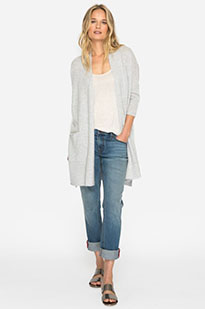

In [14]:
from IPython.display import Image
import os

file_path = os.path.join('/content/data_dir/images', os.listdir('/content/data_dir/images')[6])

Image(file_path)

### Видим результаты детекции — lower_body предмет одежды

In [16]:
from TFFashionDetection.tf_object_detector import ObjectDetector
import numpy as np

oject_detector = ObjectDetector('/content/inference_graph/frozen_inference_graph.pb', '/content/data_dir/annotations/label_map.pbtxt')

oject_detector.object_detection(image_dir='/content/data_dir/images', filename=file_path)
[[i['category_box'],i['img_name'],i['category_id'], i['category_proba']] for i in oject_detector.img_detections[:5]]
#oject_detector.img_detections
np.unique([i['category_name'] for i in oject_detector.img_detections])

array(['full-body', 'lower-body', 'upper-body'], dtype='<U10')

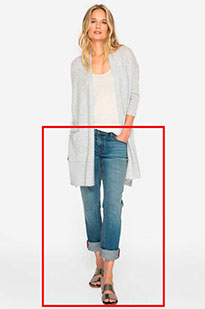

In [18]:
import sys
import os

import matplotlib.pyplot as plt
plt.switch_backend('agg')

sys.path.append(os.path.join('/content', 'models/research'))
from object_detection.utils import visualization_utils as vis_util

from PIL import Image as Pil_image

%matplotlib inline
boxes = np.array([oject_detector.img_detections[3]['category_box']])

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
# загружаем картинку и превращаем в массив
image = Pil_image.open(file_path)
image_np = load_image_into_numpy_array(image)
# накладываем на массив bounding boxes
vis_util.draw_bounding_boxes_on_image_array(image_np, boxes)
# сохраняем картинку на диск
result_file_path = os.path.join('/content', 'test.png')
vis_util.save_image_array_as_png(image_np, result_file_path)
# виуализируем картинку, которую сохранили
from IPython.display import Image
Image(result_file_path)

In [20]:
ls /content

checkpoints		      datalab		    inference_graph
checkpoint_save_20180513.zip  deep_detection_model  models
cocoapi			      fashion_data	    TFFashionDetection
data_dir		      frozen_model


#### Находим эмбеддинги изображений

In [21]:
from TFFashionDetection import feature_extraction as ftrs

ftrs.get_dir_embeddings(model_dir='/content/deep_detection_model', data_dir='/content/data_dir/images', num_top_predictions=1, max_images=500)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Изображение /content/data_dir/images/heathered_zip_pocket_sweatshorts_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/acid_wash_denim_romper_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tribal-inspired_woven_joggers_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/textured_stripe_smocked_dress_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/faux_leather_flared_skirt_img_00000042.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_dolman_sleeve_top_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/marled_knit_sweatpants_img_00000052.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/life_in_progress_chambray_joggers_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_

Изображение /content/data_dir/images/lace-paneled_crepe_dress_img_00000049.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/daisy_print_dress_img_00000078.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/diamond-stitch_sweatpants_img_00000040.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/zigzag_floral_print_skirt_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_windowpane_skirt_img_00000019.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/open-front_gauze_kimono_img_00000027.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/striped_waffle_knit_dress_img_00000011.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/caged_side_slit_tee_img_00000024.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_crochet_maxi_dress_img_00000001.

Изображение /content/data_dir/images/printed_drop-waist_cami_dress_img_00000021.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/varsity-striped_brooklyn_sweatpants_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/high-neck_blouse_img_00000075.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_crochet_dress_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/belted_wide-leg_jumpsuit_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/embroidered_overlay_sheath_dress_img_00000042.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/la_ny_graphic_tee_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/love_sleep_boxy_hoodie_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tonal_crocodile-patterned_dress_

Изображение /content/data_dir/images/abstract_stripe_sheath_dress_img_00000038.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/high-waisted_matelot_skinny_jeans_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ribbed_shawl_cardigan_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/chambray_drawstring_joggers_img_00000060.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/rose_print_shorts_img_00000047.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/geo_tribal_print_a-line_skirt_img_00000021.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/tie_dye_pencil_skirt_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_wave_patterned_dress_img_00000006.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ornate_print_skirt_img_

Изображение /content/data_dir/images/super-soft_skinny_jeans_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/ditsy_floral_skater_skirt_img_00000026.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/crochet-paneled_cami_dress_img_00000009.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_floral_plaid_skirt_img_00000045.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/led_zeppelin_muscle_tee_img_00000012.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh_racerback_tank_img_00000057.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/crisscross_back_jumpsuit_img_00000058.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/cutout_shoulder_knit_dress_img_00000031.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/longline_baseball_jersey_img_000000

Изображение /content/data_dir/images/buttoned_drawstring_joggers_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/classic_pencil_skirt_img_00000017.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/texture-striped_drawstring_shorts_img_00000005.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/classic_mom_jeans_img_00000068.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/paisley_print_sun_dress_img_00000025.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/flat-front_skinny_jeans_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/zip-front_hoodie_img_00000030.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/lace_insert_bodycon_dress_img_00000073.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/oversized_boucl&eacute;_moto_jacket_img_000

Изображение /content/data_dir/images/tropical_floral_crochet_dress_img_00000036.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/menagerie_print_tee_img_00000040.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/bejeweled_slit-sleeve_top_img_00000012.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mineral_wash_high-rise_skinny_jeans_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/longline_open-knit_cardigan_img_00000001.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/plunging_v-neckline_dress_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_midi_skirt_img_00000059.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/bandana_print_layered_tee_img_00000006.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_a-line_skir

Изображение /content/data_dir/images/be_true_graphic_tunic_tank_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/acid_wash_denim_romper_img_00000071.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/safari_animal_print_shorts_img_00000036.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mesh-paneled_workout_shorts_img_00000012.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/space_dye_yoga_leggings_img_00000003.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/sequined_chiffon_maxi_dress_img_00000008.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/pleated_wide-leg_culottes_img_00000028.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/animal_print_satin_blouse_img_00000015.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/darted_sheath_dress_img_00

Изображение /content/data_dir/images/split-neck_chiffon_blouse_img_00000013.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral_print_surplice_dress_img_00000004.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/boxy_slub_knit_tee_img_00000005.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/mixed_ornate_print_blouse_img_00000023.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/bandana_print_sweatshorts_img_00000034.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/box-pleated_maxi_dress_img_00000044.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/floral-embroidered_lace-up_dress_img_00000041.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/textured_knit_a-line_dress_img_00000032.jpg, директория /content/data_dir/images
Изображение /content/data_dir/images/abstract_print-sleeved_tee_

In [22]:
import pickle

embeds_file = '/content/data_dir/img_embeddings.pkl'

embeds = pickle.load(open(embeds_file, 'rb'))

In [23]:
from sklearn.neighbors import KDTree
import numpy as np
num_embeds = len(embeds)
embed_index = dict(zip(embeds.keys(), range(num_embeds)))
inverted_index = {j:i for i,j in embed_index.items()}

embed_matrix = np.vstack([embeds[k] for k in embed_index])

kdt = KDTree(embed_matrix, leaf_size=30, metric='euclidean')

In [24]:
test_id = embed_index[list(embed_index.keys())[620]]

test_example = embed_matrix[test_id]
sim_query = kdt.query(test_example.reshape(1,-1), k=5, return_distance=False)

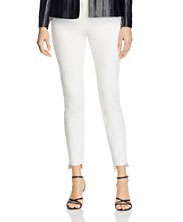

In [27]:
file_path = inverted_index[sim_query[0][1]]

Image(file_path)